In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('data1.xls')

In [5]:
test = pd.read_csv('test1_xls')

In [15]:
data.head()

,Product_Weight,Product_Fat_Content,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,0,2.0,2,1,709.08
1,11.6,0,0.0,2,0,6381.69
2,11.6,0,1.0,1,0,6381.69
3,11.6,0,1.0,2,2,2127.23
4,11.6,1,2.0,1,0,2481.77


In [10]:
test.head()

,Unnamed: 0,Product_Weight,Product_Fat_Content,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,0,8.270,2,2.0,2,1
1,1,8.270,2,0.0,2,0
2,2,7.390,0,0.0,2,0
3,3,6.115,2,2.0,2,1
4,4,6.115,2,0.0,2,0


In [16]:
test.drop('Unnamed: 0', axis = 1, inplace = True)


In [17]:
test.head()

,Product_Weight,Product_Fat_Content,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,8.270,2,2.0,2,1
1,8.270,2,0.0,2,0
2,7.390,0,0.0,2,0
3,6.115,2,2.0,2,1
4,6.115,2,0.0,2,0


In [18]:
data.columns

Index(['Product_Weight', 'Product_Fat_Content', 'Supermarket _Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

In [19]:
X = data[['Product_Weight', 'Product_Fat_Content', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type']]
y = data['Product_Supermarket_Sales']

In [21]:
from sklearn.cross_validation import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

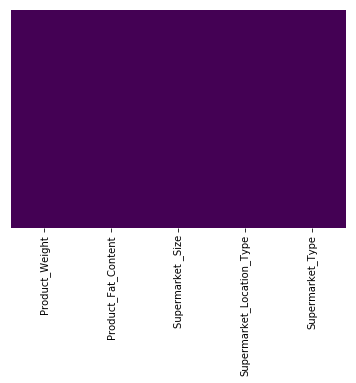

In [28]:
sns.heatmap(test.isnull(),yticklabels=False,cbar = False,cmap= 'viridis')

In [32]:
data.isnull().sum()

Product_Weight               8
Product_Fat_Content          0
Supermarket _Size            0
Supermarket_Location_Type    0
Supermarket_Type             0
Product_Supermarket_Sales    0
dtype: int64

In [33]:
test.isnull().sum()

Product_Weight               0
Product_Fat_Content          0
Supermarket _Size            0
Supermarket_Location_Type    0
Supermarket_Type             0
dtype: int64

In [38]:
data['Product_Weight'].fillna(data.groupby('Product_Fat_Content')['Product_Weight'].transform('median'), inplace = True)

In [39]:
data.isnull().sum()

Product_Weight               0
Product_Fat_Content          0
Supermarket _Size            0
Supermarket_Location_Type    0
Supermarket_Type             0
Product_Supermarket_Sales    0
dtype: int64

In [40]:
from sklearn.svm import SVR

In [41]:
model  =  SVR()

In [46]:
model.fit(data.drop('Product_Supermarket_Sales', axis =1),data['Product_Supermarket_Sales'])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
predictions = model.predict(test)

In [48]:
predictions

array([5341.3956688 , 5344.59612201, 5318.22361493, ..., 5392.57251455,
       5332.90193172, 5338.07708115])

In [53]:
data.columns

Index(['Product_Weight', 'Product_Fat_Content', 'Supermarket _Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

In [55]:
X = data[['Product_Weight', 'Product_Fat_Content', 'Supermarket _Size','Supermarket_Location_Type', 'Supermarket_Type']]

In [57]:
y = data['Product_Supermarket_Sales']

In [58]:
from sklearn.cross_validation import train_test_split


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.svm import SVR

In [ ]:
model  =  SVR()

In [61]:
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
predictions = model.predict(X_test)

In [64]:
predictions

array([5286.21518856, 5308.29564878, 5327.08657997, ..., 5292.31533169,
       5312.98      , 5311.18664074])

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score


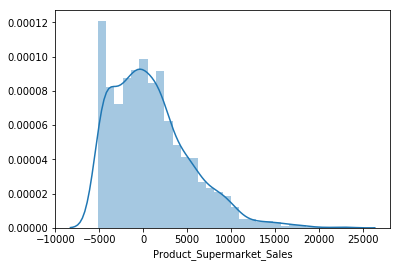

In [71]:
sns.distplot((y_test-predictions))

In [72]:
from sklearn import metrics

In [73]:
metrics.mean_absolute_error(y_test,predictions)

3474.332687615036

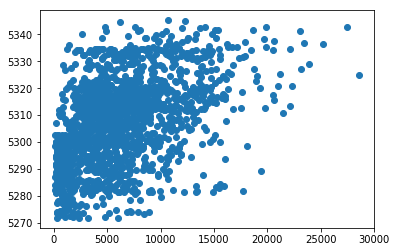

In [74]:
plt.scatter(y_test,predictions)

In [85]:
from sklearn.grid_search import GridSearchCV

In [86]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma' : [1,0.1,0.01,0.001,0.0001]}

In [87]:
grid = GridSearchCV( SVR() , param_grid , verbose =  3  )

In [100]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=-0.021820 -   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ........................ C=0.1, gamma=1, score=-0.044057 -   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ........................ C=0.1, gamma=1, score=-0.019937 -   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=-0.021961 -   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=-0.044006 -   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=-0.020041 -   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..................... C=0.1, gamma=0.01, score=-0.021977 -   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..................... C=0.1, gamma=0.01, score=-0.044147 -   0.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..................... C=0.1, gamma=0.01, score=-0.020165 -   0.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ........................ C=1000, gamma=1, score=0.377017 -   0.4s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.344455 -   0.4s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.359529 -   0.4s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.359131 -   0.3s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.346477 -   0.3s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.348837 -   0.2s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.067079 -   0.2s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   30.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [89]:
grid.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [90]:
grid.best_params_

{'C': 1000, 'gamma': 1}

In [91]:
grid_prediction = grid.predict(X_test)

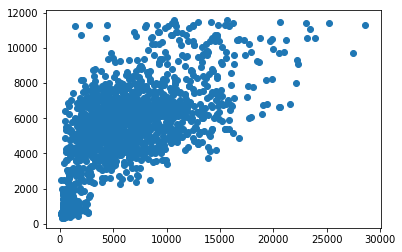

In [93]:
plt.scatter(y_test,grid_prediction)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lm = LinearRegression()

In [96]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
predictions = lm.predict(X_test)

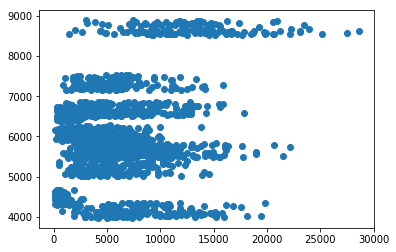

In [99]:
plt.scatter(y_test,predictions)